### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [26]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt


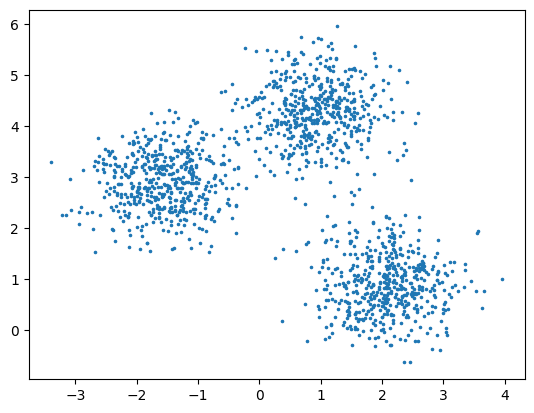

In [27]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [28]:
import numpy as np

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

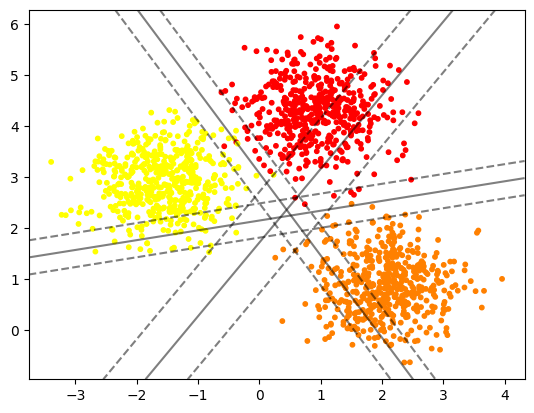

In [29]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

model = SVC(kernel='linear')

o_vs_o = OneVsOneClassifier(model)
o_vs_o.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='autumn')

for est in o_vs_o.estimators_:
    plot_svc_decision_function(est)

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

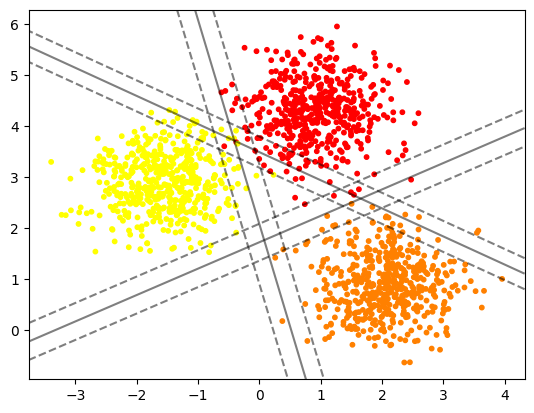

In [30]:
from sklearn.multiclass import OneVsRestClassifier

model = SVC(kernel='linear')

o_vs_r = OneVsRestClassifier(model)
o_vs_r.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='autumn')

for est in o_vs_r.estimators_:
    plot_svc_decision_function(est)

### Using 5-fold cross validation compare the accuracies of each method

0.9973333333333333
0.9960000000000001


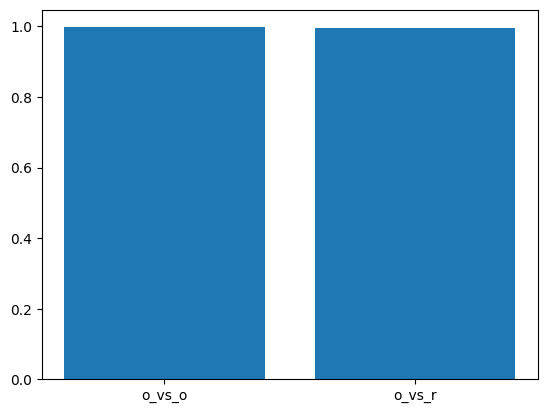

In [31]:
from sklearn.model_selection import cross_val_score

scores_o_vs_o = cross_val_score(o_vs_o, X, y, cv=5, scoring='accuracy')
scores_o_vs_r = cross_val_score(o_vs_r, X, y, cv=5, scoring='accuracy')

avg_score_o_vs_o = np.mean(scores_o_vs_o)
avg_score_o_vs_r = np.mean(scores_o_vs_r)

plt.bar(['o_vs_o', 'o_vs_r'], [avg_score_o_vs_o, avg_score_o_vs_r])
plt.show

print(avg_score_o_vs_o)
print(avg_score_o_vs_r)